Bibliotecas utilizadas

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
import seaborn as sns; sns.set_theme()
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
import graphviz
from sklearn.tree import export_graphviz
from sklearn.metrics import classification_report

Carga del dataset

In [2]:
df = pd.read_csv("./bitsDataset.csv")

In [47]:
df.shape

(4100668, 34)

Separamos variables y clase a predecir

In [3]:
bitsCols = []
for i in range(31,-1,-1):
      bitsCols.append('Bit {}'.format(i))

In [4]:
X = df.loc[:, bitsCols]
Y = df.loc[:, 'Clase']

Creamos el conjunto de entrenamiento y el de test

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=0)

### Redes neuronales
Entrenamos varias redes variando su topología y el hiperparámetro de aprendizaje

In [ ]:
regul_param_range = 10.0 ** -np.arange(1, 7) 
scores_train = [[],[],[],[]]
scores_test = [[],[],[],[]]

for regul_param in regul_param_range:
    # aumentamos el parámetro max_iter hasta que converja
    clf1=MLPClassifier(hidden_layer_sizes=(20, ), activation='relu', solver='adam', alpha=regul_param, batch_size='auto', 
             learning_rate='constant', learning_rate_init=0.001, max_iter=500, random_state = 333).fit(X_train, y_train.ravel())
    clf2=MLPClassifier(hidden_layer_sizes=(10, ), activation='relu', solver='adam', alpha=regul_param, batch_size='auto', 
             learning_rate='constant', learning_rate_init=0.001, max_iter=500, random_state = 333).fit(X_train, y_train.ravel())
    clf3=MLPClassifier(hidden_layer_sizes=(10,10, ), activation='relu', solver='adam', alpha=regul_param, batch_size='auto', 
             learning_rate='constant', learning_rate_init=0.001, max_iter=500, random_state = 333).fit(X_train, y_train.ravel())
    clf4=MLPClassifier(hidden_layer_sizes=(10,10,10 ), activation='relu', solver='adam', alpha=regul_param, batch_size='auto', 
             learning_rate='constant', learning_rate_init=0.001, max_iter=500, random_state = 333).fit(X_train, y_train.ravel())

    scores_train[0].append(accuracy_score(y_train, clf1.predict(X_train), average='micro'))
    scores_train[1].append(accuracy_score(y_train, clf2.predict(X_train), average='micro'))
    scores_train[2].append(accuracy_score(y_train, clf3.predict(X_train), average='micro'))
    scores_train[3].append(accuracy_score(y_train, clf4.predict(X_train), average='micro'))

    scores_test[0].append(accuracy_score(y_test, clf1.predict(X_test), average='micro'))
    scores_test[1].append(accuracy_score(y_test, clf2.predict(X_test), average='micro'))
    scores_test[2].append(accuracy_score(y_test, clf3.predict(X_test), average='micro'))
    scores_test[3].append(accuracy_score(y_test, clf4.predict(X_test), average='micro'))
  

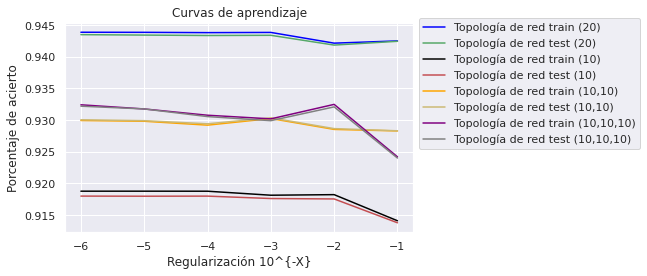

In [ ]:
fig = plt.figure()
ax = plt.subplot(111)

# Dibujamos la línea de la exactitud media en las partes de test
# Como el
plt.plot(np.log10(regul_param_range), scores_train[0], color="blue", label="Topología de red train (20)")
plt.plot(np.log10(regul_param_range), scores_test[0], color="g", label="Topología de red test (20)")

plt.plot(np.log10(regul_param_range), scores_train[1], color="black", label="Topología de red train (10)")
plt.plot(np.log10(regul_param_range), scores_test[1], color="r", label="Topología de red test (10)")

plt.plot(np.log10(regul_param_range), scores_train[2], color="orange", label="Topología de red train (10,10)")
plt.plot(np.log10(regul_param_range), scores_test[2], color="y", label="Topología de red test (10,10)")

plt.plot(np.log10(regul_param_range), scores_train[3], color="purple", label="Topología de red train (10,10,10)")
plt.plot(np.log10(regul_param_range), scores_test[3], color="grey", label="Topología de red test (10,10,10)")

# Creamos el gráfico
plt.title("Curvas de aprendizaje")
plt.xlabel("Regularización 10^{-X}"), plt.ylabel("Porcentaje de acierto"), plt.legend(loc="best")
plt.tight_layout()
ax.legend(bbox_to_anchor=(1, 1.05))
plt.savefig('curvas aprendizaje.pdf', bbox_inches="tight")
plt.show()

Entrenamos una red con la topología e hiperparámetro definitivos

In [34]:
regul_param = 10.0 ** -1
MLP=MLPClassifier(hidden_layer_sizes=(200, ), activation='relu', solver='adam', alpha=regul_param, batch_size='auto', 
             learning_rate='constant', learning_rate_init=0.001, max_iter=500, random_state = 333).fit(X_train, y_train.ravel())

Comprobamos los resultado de la red sobre el conjunto de test

In [44]:
y_test_pred_MLP = MLP.predict(X_test)

In [53]:
print(classification_report(y_test, y_test_pred_MLP))

              precision    recall  f1-score   support

         big       0.97      0.97      0.97    676943
       small       0.97      0.97      0.97    676278

    accuracy                           0.97   1353221
   macro avg       0.97      0.97      0.97   1353221
weighted avg       0.97      0.97      0.97   1353221



In [62]:
# Función extraída de
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
def plot_confusion_matrix(y_true, y_pred,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Confusion matrix normalized'
        else:
            title = 'Confusion not normalized'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = unique_labels(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Confusion matrix normalized")
    else:
        print('Confusion not normalized')

    print(cm)
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.grid(None)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='Correct label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max()/1.5
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    if normalize:
        title+= ' normalized'
    plt.savefig(title+'.pdf', bbox_inches='tight')
    return ax

Confusion not normalized
[[654132  22811]
 [ 19057 657221]]
Confusion matrix normalized
[[0.96630292 0.03369708]
 [0.02817924 0.97182076]]


<AxesSubplot:title={'center':'Neural network'}, xlabel='Predicted label', ylabel='Correct label'>

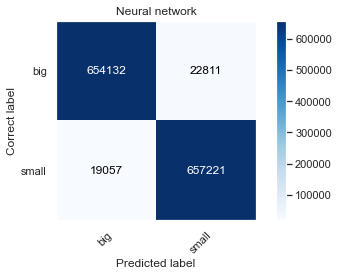

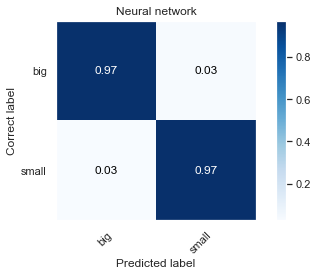

In [51]:
plot_confusion_matrix(y_test, y_test_pred_MLP, normalize = False, title='Neural network')
plot_confusion_matrix(y_test, y_test_pred_MLP, normalize = True, title='Neural network')

Mostramos mapas de calor para tratar de estudiar los pesos de la red

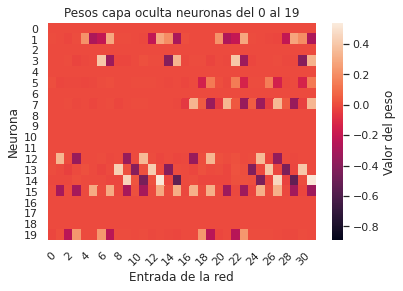

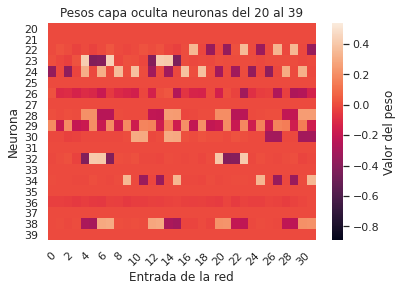

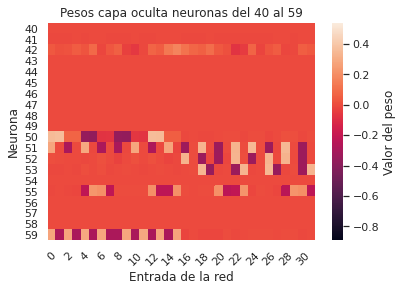

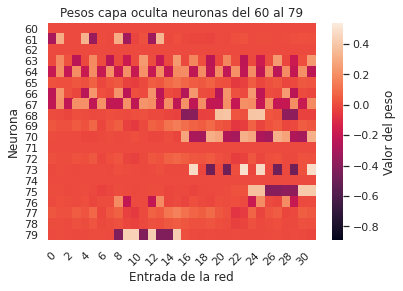

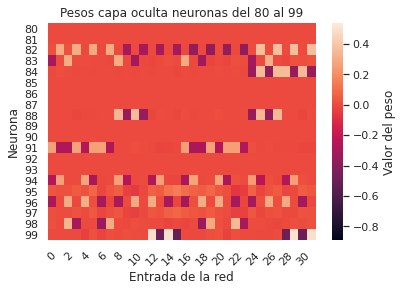

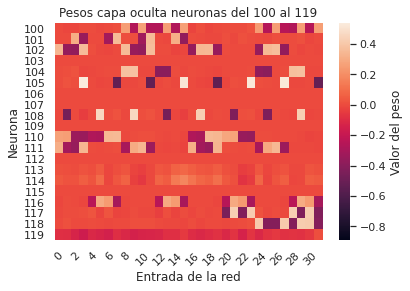

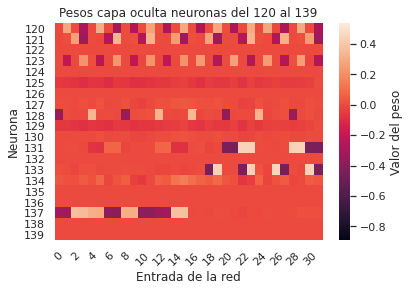

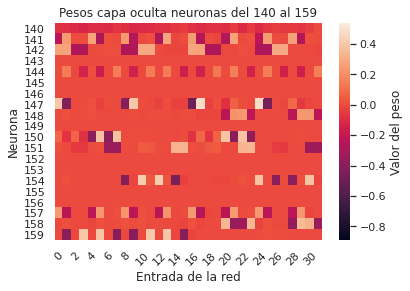

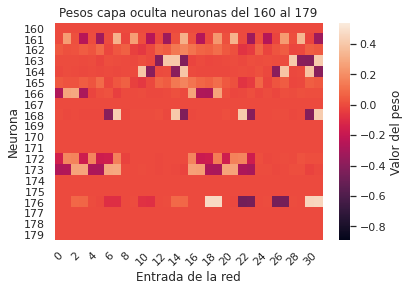

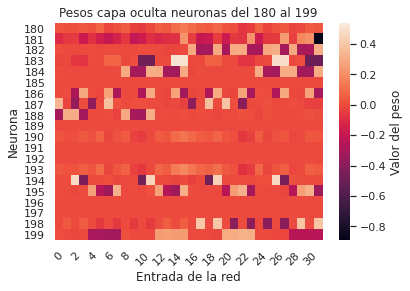

In [ ]:
pesosPrimeraCapa = MLP.coefs_[0].T
min = np.min(pesosPrimeraCapa)
max = np.max(pesosPrimeraCapa)
for i in range(0,200,20):
    fig, ax = plt.subplots()
    sns.heatmap(pesosPrimeraCapa[i:i+20], vmin=min, vmax = max, yticklabels=np.arange(i,i+20), cbar_kws={'label': 'Valor del peso'})
    plt.xticks(rotation=45)
    plt.xlabel("Entrada de la red")
    plt.ylabel("Neurona")
    ax.set_title('Pesos capa oculta neuronas del {} al {}'.format(i,i+19))
    plt.savefig('pesos{}-{}.pdf'.format(i,i+19), bbox_inches="tight")

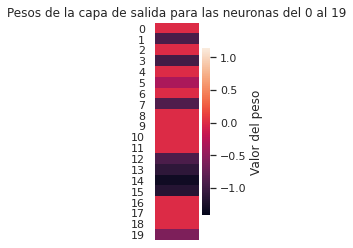

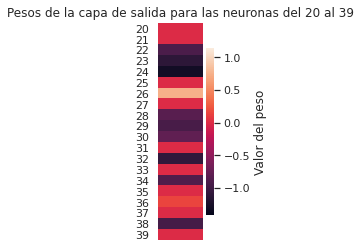

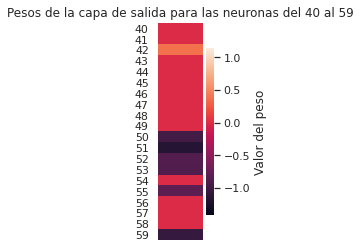

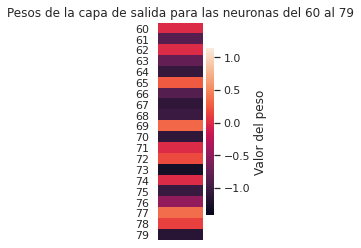

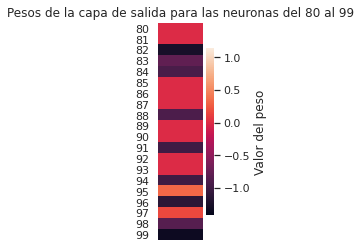

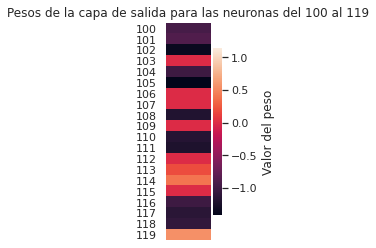

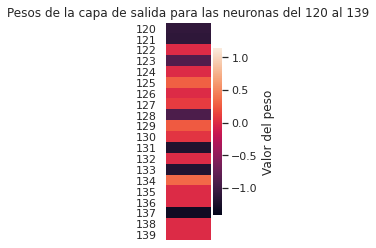

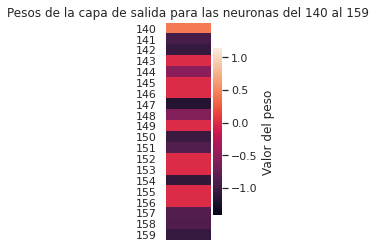

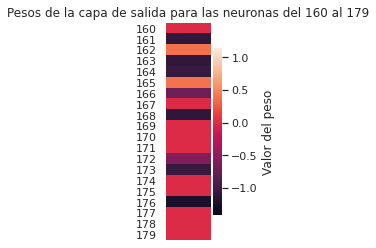

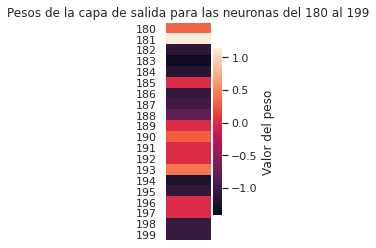

In [ ]:
pesosCapaSalida = MLP.coefs_[1]
min = np.min(pesosCapaSalida)
max = np.max(pesosCapaSalida)
for i in range(0,200,20):
    fig, ax = plt.subplots(figsize=(1,4))
    sns.heatmap(pesosCapaSalida[i:i+20], vmin=min, vmax = max,xticklabels = "", yticklabels=np.arange(i,i+20), cbar_kws={'label': 'Valor del peso'})
    ax.set_title('Pesos de la capa de salida para las neuronas del {} al {}'.format(i,i+19))
    plt.savefig('pesosSalida{}-{}.pdf'.format(i,i+19), bbox_inches="tight")

### Árboles de decisión

In [46]:
clfDT = DecisionTreeClassifier(criterion="entropy", max_depth=32, min_samples_split=0.005, random_state= 0)
# Entrenamos el árbol con los datos de training
clfDT = clfDT.fit(X_train, y_train)
# Vemos las predicciones que hace para ambos conjuntos de datos
y_test_pred_DT =clfDT.predict(X_test)

In [7]:
print(classification_report(y_test, y_test_pred_DT))

              precision    recall  f1-score   support

         big       0.86      0.84      0.85    676943
       small       0.85      0.86      0.85    676278

    accuracy                           0.85   1353221
   macro avg       0.85      0.85      0.85   1353221
weighted avg       0.85      0.85      0.85   1353221



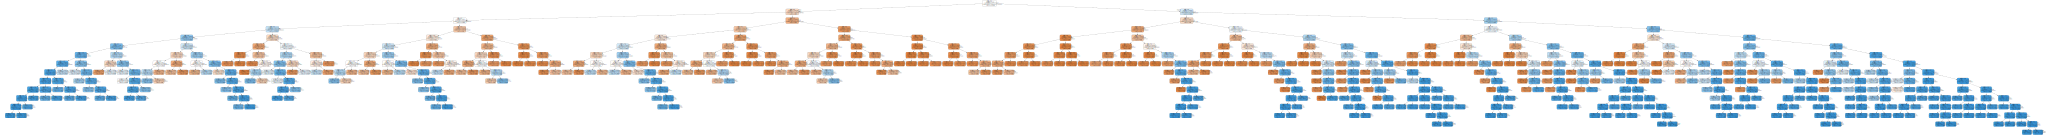

In [8]:
dot_data = export_graphviz(clfDT, out_file = None, feature_names = X.axes[1], class_names =clfDT.classes_, filled = True, rounded = True, special_characters = True)
graph = graphviz.Source(dot_data)
graph.format = 'pdf'
graph.render('graphicBitsDT',view=True)
graph

Confusion not normalized
[[570665 106278]
 [ 94191 582087]]
Confusion matrix normalized
[[0.84300303 0.15699697]
 [0.13927852 0.86072148]]


<AxesSubplot:title={'center':'Decision tree'}, xlabel='Predicted label', ylabel='Correct label'>

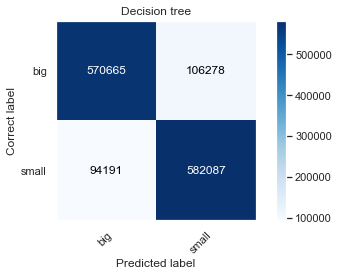

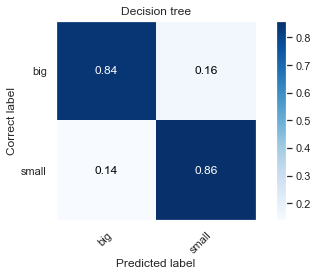

In [52]:
plot_confusion_matrix(y_test, y_test_pred_DT, normalize = False, title='Decision tree')
plot_confusion_matrix(y_test, y_test_pred_DT, normalize = True, title='Decision tree')

### Regresión Logística

In [53]:
clfLR = LogisticRegression(random_state=333).fit(X_train, y_train)

In [54]:
y_test_pred_LR = clfLR.predict(X_test)

In [41]:
print(classification_report(y_test, y_test_pred_LR))

              precision    recall  f1-score   support

         big       0.66      0.66      0.66    676943
       small       0.66      0.66      0.66    676278

    accuracy                           0.66   1353221
   macro avg       0.66      0.66      0.66   1353221
weighted avg       0.66      0.66      0.66   1353221



Confusion not normalized
[[445531 231412]
 [226700 449578]]
Confusion matrix normalized
[[0.65815142 0.34184858]
 [0.33521717 0.66478283]]


<AxesSubplot:title={'center':'Logistic regression'}, xlabel='Predicted label', ylabel='Correct label'>

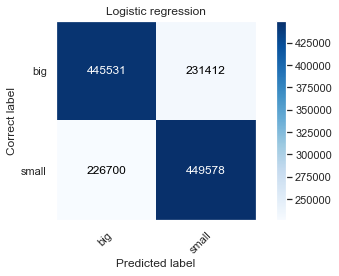

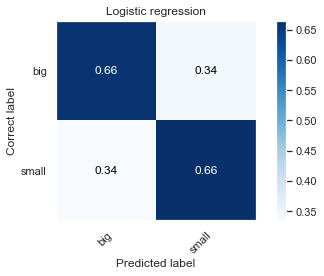

In [63]:
plot_confusion_matrix(y_test, y_test_pred_LR, normalize = False, title='Logistic regression')
plot_confusion_matrix(y_test, y_test_pred_LR, normalize = True, title='Logistic regression')

In [64]:
clfLR.coef_[0]

array([0.2340721 , 0.07685711, 0.07898907, 0.26004333, 0.08168372,
       0.25886134, 0.26754534, 0.12642686, 0.06920695, 0.26679627,
       0.25922688, 0.12374506, 0.25633908, 0.14014522, 0.14094179,
       0.0855392 , 0.09128268, 0.28247959, 0.2777036 , 0.13711877,
       0.26139906, 0.13046715, 0.12741038, 0.06548111, 0.27176315,
       0.14025172, 0.13850185, 0.07004483, 0.12502397, 0.07157163,
       0.06986982, 0.46651642])